<a href="https://colab.research.google.com/github/EstebanFTellezR/Modelaci-n-y-aja/blob/main/El_algoritmo_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

# El algoritmo K-Means

Es un método de clustering NO supervisado, que divide un conjunto de datos en $k$ grupos o "clusters". Para encontrar los mejores conjuntos de datos, se debe resolver un problema de optimización el cual consistirá en minimizar la suma de las distancias al cuadrado de cada punto de datos a su centroide más cercano.

## 1. Plantenamiento del problema de optimización

Dado un conjunto de datos $X = {x_1,x_2,...,x_n}$, donde cada $x_i \in \mathbb{R}^d$ representa un punto en un espacio de $d$ dimensiones, se quiere encontrar $k$ clusters y sus respectivos centroides $\mu_1, \mu_2,...,\mu_k$ tal que minimice la suma de las distancias cuadradas entre cada punto y el centroide más cercano

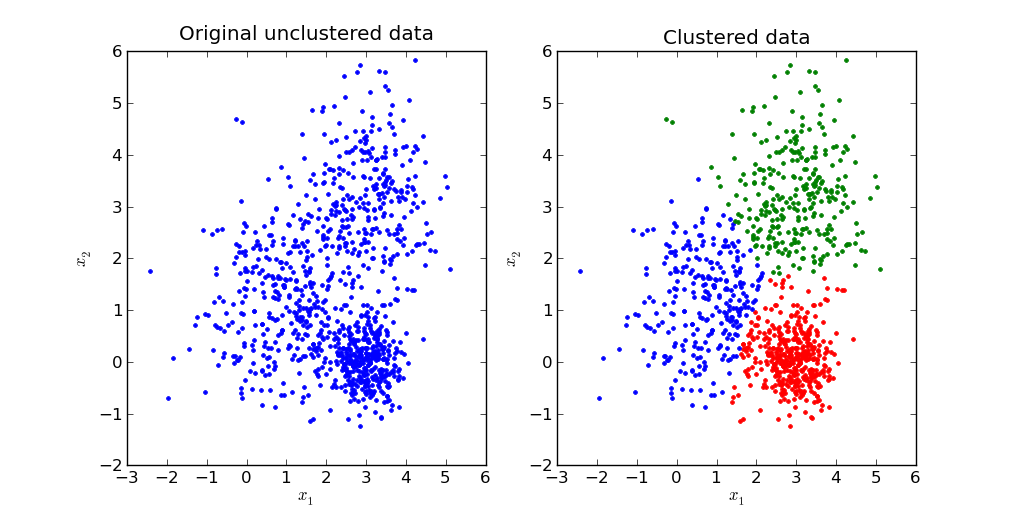

In [ ]:
Image(filename=r"C:\Users\leidy\Desktop\k1.png")

## 2. Variables

- $k$: cantidad de clusters.
- $\mu_j$: centroide del cluster $j-$ésimo, con $j=1,2,...,k$.
- $x_i$: punto de datos $i-$ésimo, con $i=1,2,...,n$.
- $C_j$: conjunto de puntos que pertenecen al cluster $j-$ésimo.


## 3. Función Objetivo


Queremos minimizar la siguiente función de costo, que es la **suma de las distancias cuadradas** entre cada punto $ x_i $ y el centroide del cluster al que pertenece:

$$
\text{Min } J = \sum_{j=1}^{k} \sum_{x_i \in C_j} \| x_i - \mu_j \|^2,
$$

donde:
- $ x_i \in C_j $ significa que el punto $ x_i $ pertenece al cluster $ j $.
- $ D $ es el número de dimensiones, y $ x_{i,d} $ y $ \mu_{j,d} $ son las coordenadas de los puntos y los centroides en la dimensión $ d $-ésima.

Sujeto a:

### Restricciones:

- $|| x_i - \mu_j ||^2$ es la **distancia euclidiana** al cuadrado entre el punto $ x_i $ y el centroide $ \mu_j $, que se define como:

$$|| x_i - \mu_j ||^2 = \sum_{d=1}^{D} \left( x_{i,d} - \mu_{j,d} \right)^2
$$
- Cada punto $ x_i $ debe estar asignado a **un solo cluster**.
- El número de clusters $ k $ está predefinido, pero los centroides $ \mu_1, \dots, \mu_k $ son variables que deben optimizarse.

## 4. Pasos del problema de optimización:

1. **Asignación**: Para cada punto $ x_i $, asignarlo al cluster cuyo centroide está más cerca. Esto significa que para cada $ i $, se selecciona el cluster $ j$ que minimiza $|| x_i - \mu_j ||^2 $. En otras palabras, asignamos:

$$
C_j = \{ x_i : \| x_i - \mu_j \|^2 \leq \| x_i - \mu_l \|^2, \forall l = 1, 2, \dots, k \}
$$

2. **Actualización de los centroides**: Una vez que los puntos están asignados a los clusters, los centroides se actualizan calculando el **promedio** de los puntos asignados a cada cluster. Para cada cluster \( j \), el nuevo centroide se calcula como:

$$
\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i,
$$

donde $|C_j| $ es el número de puntos en el cluster $ C_j $.

3. **Repetir**: El proceso de asignación y actualización de los centroides se repite hasta que los centroides no cambien significativamente o hasta que se alcance un número máximo de iteraciones.


Iteración 1:
Cluster 1: [array([1, 2]), array([2, 3])]
Cluster 2: [array([3, 4]), array([6, 8]), array([7, 9]), array([ 8, 10])]
Nuevos centroides: [array([1.5, 2.5]), array([6.  , 7.75])]

Iteración 2:
Cluster 1: [array([1, 2]), array([2, 3]), array([3, 4])]
Cluster 2: [array([6, 8]), array([7, 9]), array([ 8, 10])]
Nuevos centroides: [array([2., 3.]), array([7., 9.])]

Iteración 3:
Cluster 1: [array([1, 2]), array([2, 3]), array([3, 4])]
Cluster 2: [array([6, 8]), array([7, 9]), array([ 8, 10])]
Nuevos centroides: [array([2., 3.]), array([7., 9.])]
Centroides no han cambiado, el algoritmo ha convergido.


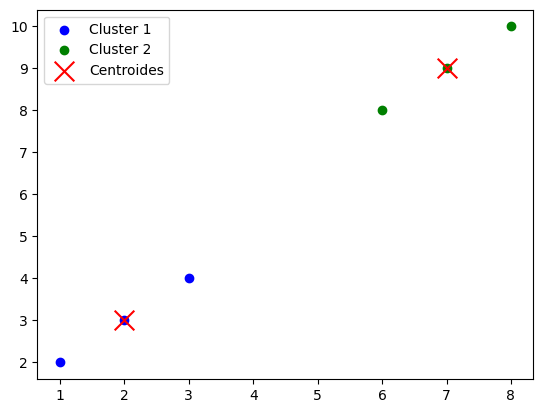

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Usemos unos puntos sencillos para entender la lógica del algoritmo
data = np.array([[1, 2], [2, 3], [3, 4], [6, 8], [7, 9], [8, 10]])

# Definimos la cantidad de clusters
k = 2

# Realizamos una selección aleatoria de los centroides
centroides = data[np.random.choice(data.shape[0], k, replace=False)]

# Definimos la métrica de cómo vamos a medir la distancia entre puntos
def calcular_distancia(punto1, punto2):
    return np.sqrt(np.sum((punto1 - punto2)**2))

# Definimos una cantidad de iteraciones de 10 para el proceso de optimización
for iteracion in range(10):
    print(f"\nIteración {iteracion+1}:")

    # Asignamos cada punto al centroide más cercano
    clusters = [[] for _ in range(k)]
    for punto in data:
        distancias = [calcular_distancia(punto, centroide) for centroide in centroides]
        cluster_mas_cercano = np.argmin(distancias)
        clusters[cluster_mas_cercano].append(punto)

    # Imprimimos la asignación de clusters
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {cluster}")

    # Calculamos nuevos centroides como el promedio de los puntos en cada cluster y le agregamos la condiciòn de que
    # si un cluster queda vacío, entonces que se quede con el centroide anterior
    nuevos_centroides = []
    for cluster in clusters:
        nuevo_centroide = np.mean(cluster, axis=0) if cluster else centroides[len(nuevos_centroides)]
        nuevos_centroides.append(nuevo_centroide)

    # Imprimimos los nuevos centroides
    print(f"Nuevos centroides: {nuevos_centroides}")

    # Verificarmos si los centroides han cambiado, para saber si ya no optimiza más
    if np.allclose(centroides, nuevos_centroides):
        print("Centroides no han cambiado, el algoritmo ha convergido.")
        break

    # Actualizamos los centroides para la siguiente iteración
    centroides = nuevos_centroides

# Graficamos los puntos y los centroides finales
colors = ['blue', 'green']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    if len(cluster) > 0:
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter([c[0] for c in centroides], [c[1] for c in centroides], color='red', marker='x', s=200, label='Centroides')
plt.legend()
plt.show()


## 5. Desglose del código

Tenemos los siguientes puntos:

$$
\text{data} = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
3 & 4 \\
6 & 8 \\
7 & 9 \\
8 & 10 \\
\end{pmatrix}
$$

Y los centroides iniciales aleatorios:

$$
\mu_1 = (1, 2), \quad \mu_2 = (8, 10)
$$


### Paso 1: Asignación de puntos a los clusters

Calculamos la distancia euclidiana a los dos centroides y asignamos el punto al centroide más cercano.

$$
d(x_i, \mu_1) = \sqrt{(x_i - \mu_1^x)^2 + (y_i - \mu_1^y)^2}
$$
$$
d(x_i, \mu_2) = \sqrt{(x_i - \mu_2^x)^2 + (y_i - \mu_2^y)^2}
$$

Por ejemplo, calculemos las distancias para el primer punto $ (1, 2) $:

$$
d((1, 2), \mu_1) = \sqrt{(1 - 1)^2 + (2 - 2)^2} = \sqrt{0 + 0} = 0
$$
$$
d((1, 2), \mu_2) = \sqrt{(1 - 8)^2 + (2 - 10)^2} = \sqrt{(-7)^2 + (-8)^2} = \sqrt{49 + 64} = \sqrt{113} \approx 10.63
$$

El punto $ (1, 2) $ está más cerca del centroide $ \mu_1 $.

Repitiendo el proceso para los otros puntos, obtenemos las siguientes asignaciones:

- **Cluster 1 (centrado en $ \mu_1 $))**: $ (1, 2), (2, 3), (3, 4) $
- **Cluster 2 (centrado en $ \mu_2 $)**: $ (6, 8), (7, 9), (8, 10) $

### Paso 2: Actualización de los centroides

Para cada cluster, calculamos el nuevo centroide como el **promedio** (media aritmética) de los puntos en ese cluster (sumando las coordenadas $ x $ y $ y $ de los puntos del cluster y dividiéndolo por el número de puntos en el cluster).

#### Actualización de $\mu_1 $:

Los puntos en el **Cluster 1** son $ (1, 2), (2, 3), (3, 4) $.

El nuevo centroide $ \mu_1 $ se calcula como el promedio de estos puntos:

$$
\mu_1^x = \frac{1 + 2 + 3}{3} = \frac{6}{3} = 2
$$

$$
\mu_1^y = \frac{2 + 3 + 4}{3} = \frac{9}{3} = 3
$$

Por lo tanto, el nuevo centroide $ \mu_1 $ es:

$$
\mu_1 = (2, 3)
$$

#### Actualización de $ \mu_2 $:

Los puntos en el **Cluster 2** son $ (6, 8), (7, 9), (8, 10) $.

El nuevo centroide $\mu_2$ se calcula como el promedio de estos puntos:

$$
\mu_2^x = \frac{6 + 7 + 8}{3} = \frac{21}{3} = 7
$$

$$
\mu_2^y = \frac{8 + 9 + 10}{3} = \frac{27}{3} = 9
$$

Por lo tanto, el nuevo centroide  $\mu_2 $ es:

$$
\mu_2 = (7, 9)
$$

### Paso 3: Repetir

En este punto, hemos actualizado los centroides. Ahora repetiríamos el proceso:
1. Asignamos cada punto al nuevo centroide más cercano.
2. Recalculamos los centroides.
   
Y este ciclo continúa hasta que los centroides no cambien significativamente (decimos que el algoritmo converge) o cuando se acaban las iteraciones definidas.


## 6. Ejemplo Práctico

Centroides de los clusters:
[[ 5.08705651e-01 -2.01986720e-02 -6.29852189e-02  8.72623627e-01
  -2.29734585e-02  3.82088950e-02]
 [-1.31224148e+00  4.02865583e-04  9.00827052e-02  9.18676472e-02
   4.12708505e-02 -1.13474624e-01]
 [ 4.59700123e-01  2.10837773e-02 -1.83824653e-03 -9.94001609e-01
  -7.07208240e-03  4.58739617e-02]]


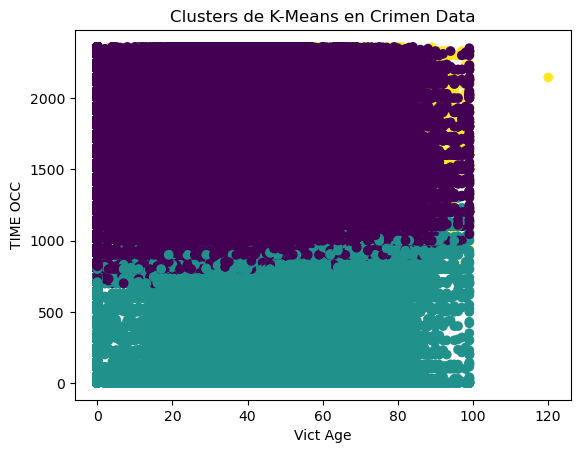

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_path = r'C:\Users\leidy\Desktop\Actividad\Crime_Data_from_2020_to_Present_Parte_1.csv'
df = pd.read_csv(file_path)

X = df[['TIME OCC', 'AREA', 'Vict Age', 'Year', 'Month', 'Day']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Centroides de los clusters:")
print(kmeans.cluster_centers_)

plt.scatter(df['Vict Age'], df['TIME OCC'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Vict Age')
plt.ylabel('TIME OCC')
plt.title('Clusters de K-Means en Crimen Data')
plt.show()
